In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [788]:
ind = [i for i in range(0,801)]
# col = [i for i in range(1, 64)]
df = pd.read_csv("result_velocities_4x20_938_nu2_f4000_newriecker_mu0_step800_39try_bordercond.txt", sep=" ",
                 names=ind, index_col=False)

In [789]:
df_elem = pd.read_csv("elements_df_4x20_938.txt", names=['id', 'node1', 'node2', 'node3', 'node4'])

df_nodes = pd.read_csv("nodes_df_4x20_938.txt", names=['ind', 'x', 'y'])

In [197]:
df.iloc[:, 230]

0       0.000000
1      13.982600
2       0.000000
3      21.722700
4       0.000000
5      20.785500
6       0.000000
7      17.852700
8       0.000000
9      14.920000
10      0.000000
11    171.420000
12    -25.094400
13     34.401400
14     -0.293217
15     74.016000
16     24.597100
17    136.186000
18      0.000000
19    133.044000
20      0.000000
21    160.158000
22      0.000000
23    152.232000
24      0.000000
25    144.306000
26     24.597100
27    126.233000
28     -0.293215
29     97.074300
30    -25.094400
31     44.354300
32    -24.277000
33     42.954900
34    -23.459700
35     39.377800
36    -24.277000
37     35.800800
38      0.494380
39     88.041700
40      1.281810
41     85.545000
42      0.494324
43     83.048800
44     24.759400
45    127.633000
46     24.921600
47    131.210000
48     24.759400
49    134.787000
Name: 230, dtype: float64

In [208]:
df[df.iloc[:, 3] != 0].iloc[:, 3]

1     0.013533
3     0.013533
5     0.013533
7     0.013533
9     0.013533
13    0.006767
31    0.006767
33    0.006767
35    0.006767
37    0.006767
Name: 3, dtype: float64

In [768]:
df_elem[df_elem.node1 == 7102]

,id,node1,node2,node3,node4
6888,6889.0,7102.0,7103.0,7197.0,7196.0


In [857]:
df_nodes[df_nodes.ind == 5]#.iloc[30:70]

,ind,x,y
6,5.0,-1.0,2.0


In [34]:
df_nodes[(df_nodes.x.values.astype(np.int) == 0) & (df_nodes.y.values.astype(np.int) == 0)].iloc[:50]

NameError: name 'df_nodes' is not defined

In [790]:
V_comp = np.array(df[df.iloc[:, 0] == 57].iloc[0, 1:]) # 5 - 25
V_comp1 = np.array(df[df.iloc[:, 0] == 3].iloc[1, 1:]) # 3 - 4x20


V = [-ricker(f, new_t) * 2 * np.pi * a1 * np.sin(2*np.pi/length * (x - a1*new_t)) for new_t in t]

V1 = [-ricker(f, new_t) * 2 * np.pi * a2 * np.sin(2*np.pi/length * (x - a2*new_t)) for new_t in t]
# V = [ricker(f, new_t) * np.cos(2*np.pi * f * new_t) for new_t in t]
# V_comp = np.array(df[df.iloc[:, 0] == 3442].iloc[0, 1:])
# V_comp1 = np.array(df[df.iloc[:, 0] == 3442].iloc[1, 1:])

In [36]:
t_comp = np.arange(0.0, 0.8, 0.001)
# t = np.arange(0.0, 0.08, 0.001)

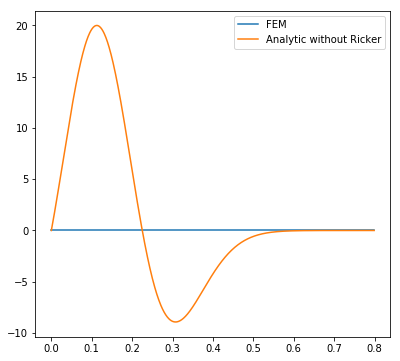

In [776]:
plt.figure(figsize=(14, 6))
# 20th freq = 1
plt.subplot(122)
# plt.plot(t, np.array([ricker(2, i) for i in t]), label='Ricker wavelet')
plt.plot(t_comp, V_comp, label='FEM')
plt.legend()

# plt.subplot(121)
# a1 = np.sqrt(120)
f = 2 # A low wavelength of 10 Hz 1.8 for 25, 1
length = a1 / f# 7.5 for 25, 3.5
# V = [ricker(f, new_t) * 2 * np.pi * a1 * np.sin(2*np.pi * f * new_t) for new_t in t]
# V = [2 * np.pi * a1 * np.sin(2*np.pi * f * new_t) for new_t in t]
# V = [ - ricker(f, new_t) * 2 * np.pi * a1 * np.sin(2*np.pi * f * new_t) for new_t in t]
V = [a2 * ricker(f,new_t) for new_t in t]
plt.plot(t, V, label='Analytic without Ricker')
# plt.title("Prodolnaya")
plt.legend()
plt.show()

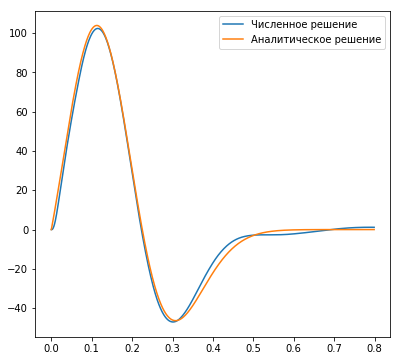

In [794]:
plt.figure(figsize=(14, 6))
# 20th freq = 1
plt.subplot(122)
plt.plot(t_comp, V_comp1*2.8, label='Численноe решение')
# plt.legend()

# a1 = np.sqrt(120)
f = 2 # A low wavelength of 10 Hz 1.8 for 25, 1
length = a1 / f# 7.5 for 25, 3.5
# V = [ricker(f, new_t) * 2 * np.pi * a1 * np.sin(2*np.pi/length * a1*new_t) for new_t in t]
V = [a1 * 3 * ricker(f, new_t) for new_t in t]
# plt.subplot(121)
# plt.plot(t, V_comp1, label='Using finite method')
plt.plot(t, V, label='Аналитическое решение')
# plt.title("Prodolnaya")
plt.legend()
# plt.savefig('plot1.png')
plt.show()

In [55]:
def ricker(f, t=0.001):
    offset = 1 / (np.sqrt(2) * np.pi * f)
    A = (1.0 - 2.0*(np.pi**2)*(f**2)*((t-offset)**2)) * np.exp(-(np.pi**2)*(f**2)*((t-offset)**2))
#     A = np.exp(-(np.pi**2)*(f**2)*(t**2)) * (-6 * np.pi**2 * f**2 * t + 4 * np.pi**4 * f**4 * t**3)
#     A = 1
    return A

def ricker_div(f, t):
    t = t - 1 / (np.sqrt(2) * np.pi * f)
    A = (- 6 * np.pi**2 * f**2 * t + 2 * np.pi**4 * f**4 * t**4) * np.exp(-np.pi**2 * f**2 * t**2)
    return A
 
f = 0.2 # A low wavelength of 10 Hz 1.8 for 25, 1
length = 1.4 / f # 7.5 for 25, 3.5
t = np.arange(0, 0.8, 0.001)

In [51]:
x = 0
lamb = 4000000#5000000
mu = 4000000#0
ro = 10000
a1 = np.sqrt((lamb + 2*mu) / ro)
a2 = np.sqrt(mu / ro)

# V = [-ricker(f, new_t) * 2 * np.pi * a1 * np.sin(2*np.pi/length * (x - a1*new_t)) for new_t in t]

# V1 = [-ricker(f, new_t) * 2 * np.pi * a2 * np.sin(2*np.pi/length * (x - a2*new_t)) for new_t in t]

In [90]:
def heviside(x):
    if (x >= 0):
        return 1
    else:
        return 0

def tochechn(f, t, x=2, z=2):
    r = np.sqrt(x**2 + z**2)
    tau_p = r / a1
    tau_s = r / a2
#     print((t**2 - tau_s**2)**(1/2))
    G1 = 1 / a1**2 * np.abs(t**2 - tau_p**2)**(-1/2) \
         * heviside(t-tau_p) + 1 / r**2 * np.abs(t**2 - tau_p**2)**(1/2) \
         * heviside(t-tau_p) - 1 / r**2 * np.abs(t**2 - tau_s**2)**(1/2) \
         * heviside(t-tau_s)
    G3 = - 1 / a2**2 * np.abs(t**2 - tau_s**2)**(-1/2) \
         * heviside(t-tau_p) + 1 / r**2 * np.abs(t**2 - tau_p**2)**(1/2) \
         * heviside(t-tau_p) - 1 / r**2 * np.abs(t**2 - tau_s**2)**(1/2) \
         * heviside(t-tau_s)
#     print(G1, G3)
    U1 = f / (2*np.pi*ro) * x*z/r**2 * (G1 + G3)
    U3 = f / (2*np.pi*ro*r**2) * (z**2 * G1 - x**2 * G3)
    
    return U1, U3

In [88]:
tochechn(ricker(2, 0.3), 0.3)[1]

0.264575131106459
0.005899251781992361 -0.006436611389186452


-4.3507582907262324e-08

In [103]:
t = np.arange(0.001,0.1, 0.001)
u1 = [tochechn(4000*ricker(0.2, new_t), new_t)[0] for new_t in t]
u3 = [tochechn(4000*ricker(0.2, new_t), new_t)[1] for new_t in t]

E:\anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
E:\anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
E:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


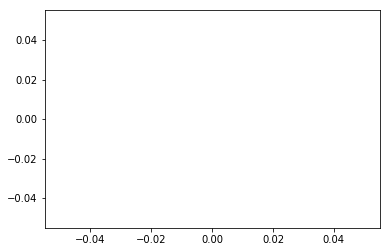

In [104]:
plt.plot(t, u1)

In [4]:
 a1

34.64101615137755

In [37]:
(1.5) / 0.0700

21.428571428571427

In [18]:
a2

20.0

In [24]:
nu = 0.25
k = (1.12 * nu + 0.87) / (1 + x)
k

1.15

In [32]:
1.15 * a2

23.0

In [33]:
a2

20.0

In [31]:
2.2 / 0.100

22.0

In [29]:
(2.1) / 0.100

21.0

Text(0.5, 0, 'Количество узлов')

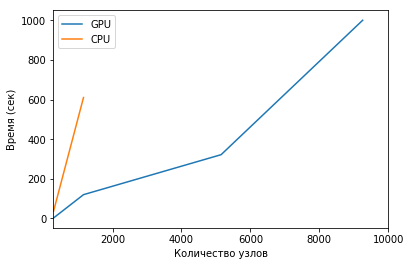

In [50]:
plt.plot([288, 1156, 5151, 9261], [2.872, 120.2, 321.848, 1000], label='GPU')
plt.plot([288, 1156], [37.6, 610], label='CPU')
plt.xlim(280, 10000)
plt.legend()
plt.ylabel("Время (сек)")
plt.xlabel("Количество узлов")

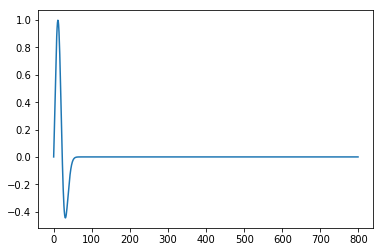

In [772]:
plt.plot(np.array([ricker(20, i) for i in t]))
plt.show()

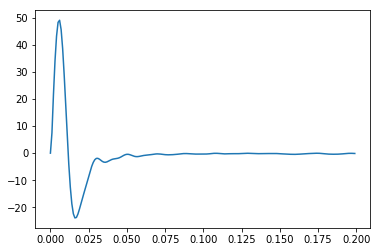

In [48]:
plt.plot(t, V_comp)

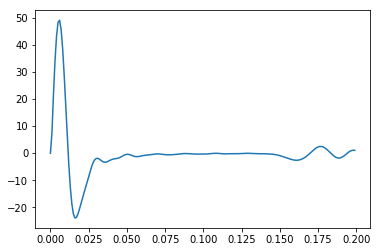

In [60]:
plt.plot(t, V_comp)

In [9]:
9216 / 9

1024